# Examining Green Water in Goías & Matto Grosso in Brazil

In [169]:
# Read in necessary libraries
import pandas as pd
import altair as alt
import datetime as dt

# Save a vega-lite spec and a PNG blob for each plot in the notebook
alt.renderers.enable('mimetype')
# Handle large data sets without embedding them in the notebook
alt.data_transformers.enable('data_server')

DataTransformerRegistry.enable('data_server')

In [170]:
# Read in Goías data
goias = pd.read_csv("Goias 2020-01-01 to 2022-01-01.csv")

# Examine the dataset
goias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              732 non-null    object 
 1   datetime          732 non-null    object 
 2   tempmax           727 non-null    float64
 3   tempmin           727 non-null    float64
 4   temp              727 non-null    float64
 5   feelslikemax      727 non-null    float64
 6   feelslikemin      727 non-null    float64
 7   feelslike         727 non-null    float64
 8   dew               727 non-null    float64
 9   humidity          727 non-null    float64
 10  precip            727 non-null    float64
 11  precipprob        0 non-null      float64
 12  precipcover       727 non-null    float64
 13  preciptype        0 non-null      float64
 14  snow              0 non-null      float64
 15  snowdepth         0 non-null      float64
 16  windgust          0 non-null      float64
 1

In [173]:
# Change column from dtype object to datetime
goias['datetime'] =  pd.to_datetime(goias['datetime'], infer_datetime_format=True)

# Split datetime column into da
goias['day'] = goias['datetime'].dt.day
goias['month'] = goias['datetime'].dt.month
goias['year'] = goias['datetime'].dt.year

#drop empty columns
ng = goias.dropna(how='all', axis=1)

#drop cloudcover
ng = ng.drop('cloudcover', axis=1)
ng.head()

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,sunrise,sunset,moonphase,conditions,description,icon,stations,day,month,year
0,Goias,2020-01-01,32.2,22.2,26.4,34.8,22.2,27.4,20.5,70.89,...,2020-01-01T05:52:18,2020-01-01T18:55:38,0.17,Clear,Clear conditions throughout the day.,clear-day,8.671210e+10,1,1,2020
1,Goias,2020-01-02,28.7,23.6,25.8,31.0,23.6,26.6,20.6,73.63,...,2020-01-02T05:52:53,2020-01-02T18:55:59,0.22,Clear,Clear conditions throughout the day.,clear-day,8.671210e+10,2,1,2020
2,Goias,2020-01-03,28.7,22.6,25.2,31.4,22.6,25.8,20.8,77.03,...,2020-01-03T05:53:29,2020-01-03T18:56:19,0.26,Clear,Clear conditions throughout the day.,clear-day,8.671210e+10,3,1,2020
3,Goias,2020-01-04,27.2,23.1,24.1,29.6,23.1,24.3,21.9,87.43,...,2020-01-04T05:54:04,2020-01-04T18:56:38,0.31,Clear,Clear conditions throughout the day.,clear-day,8.671210e+10,4,1,2020
4,Goias,2020-01-05,29.1,22.1,24.0,32.7,22.1,24.5,22.0,88.80,...,2020-01-05T05:54:40,2020-01-05T18:56:56,0.36,Clear,Clear conditions throughout the day.,clear-day,8.671210e+10,5,1,2020


In [183]:
# Create a plot of humidity vs Date
goias_hum = (
    alt.Chart(ng)
    .mark_bar()
    .encode(
        alt.X('datetime', title = "Date"),
        alt.Y('humidity', title ='Humidity'),
        alt.Color('humidity',  scale=alt.Scale(scheme='greenblue'))
    ).properties(title= "Goias, Brazil: Jan 2020 - Jan 2022", width=600, height=250)
)


# Create a plot of dew vs date
goias_dew = (
    alt.Chart(ng)
    .mark_line()
    .encode(
        alt.X('datetime', title="Date"),
        alt.Y('dew', title ='Dew'),
        #alt.Color('dew',  scale=alt.Scale(scheme='viridis', reverse=True))
    ).properties(title= "Goias, Brazil: Jan 2020 - Jan 2022", width=600, height=250)
)


## Examining Matto Grosso

In [141]:
# read in matto grosso data
mattog = pd.read_csv("Matto Grosso 2021-06-01 to 2022-02-22.csv")


# change from object dtype to dtype datetime 
mattog['datetime'] =  pd.to_datetime(mattog['datetime'], infer_datetime_format=True)

# split datetime column into 3 - day, month, year
mattog['day'] = mattog['datetime'].dt.day
mattog['month'] = mattog['datetime'].dt.month
mattog['year'] = mattog['datetime'].dt.year

mattog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 36 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   name              267 non-null    object        
 1   datetime          267 non-null    datetime64[ns]
 2   tempmax           267 non-null    float64       
 3   tempmin           267 non-null    float64       
 4   temp              267 non-null    float64       
 5   feelslikemax      267 non-null    float64       
 6   feelslikemin      267 non-null    float64       
 7   feelslike         267 non-null    float64       
 8   dew               267 non-null    float64       
 9   humidity          267 non-null    float64       
 10  precip            267 non-null    float64       
 11  precipprob        44 non-null     float64       
 12  precipcover       223 non-null    float64       
 13  preciptype        26 non-null     object        
 14  snow              44 non-n

In [180]:
# Create a plot of humidity vs Date
matto_hum = (
    alt.Chart(mattog)
    .mark_circle()
    .encode(
        alt.X('datetime', title = "Date"),
        alt.Y('humidity', title ='Percipitation'),
        alt.Color('humidity',  scale=alt.Scale(scheme='viridis'))
    ).properties(title= "Matto Grosso, Brazil: June 2021 - Feb 2022", width=600, height=250)
)

# Create a plot of dew vs Date
matto_dew = (
    alt.Chart(mattog)
    .mark_line()
    .encode(
        alt.X('datetime', title = "Date"),
        alt.Y('dew', title ='Dew'),
        #alt.Color('percip:Q',  scale=alt.Scale(scheme='greenblue'))
    ).properties(title= "Matto Grosso, Brazil: June 2021 - Feb 2022", width=600, height=250)
)

In [181]:
#matto_dew & matto_hum

## Examining Brazil

In [177]:
# Read in the data
brazil = pd.read_csv("Brazil 2020-01-01 to 2022-01-01.csv")

# change from object dtype to dtype datetime 
brazil['datetime'] =  pd.to_datetime(brazil['datetime'], infer_datetime_format=True)

# split datetime column into 3 - day, month, year
brazil['day'] = brazil['datetime'].dt.day
brazil['month'] = brazil['datetime'].dt.month
brazil['year'] = brazil['datetime'].dt.year

#drop empty columns
brazil = brazil.dropna(how='all', axis=1)

brazil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   name              732 non-null    object        
 1   datetime          732 non-null    datetime64[ns]
 2   tempmax           732 non-null    float64       
 3   tempmin           732 non-null    float64       
 4   temp              732 non-null    float64       
 5   feelslikemax      732 non-null    float64       
 6   feelslikemin      732 non-null    float64       
 7   feelslike         732 non-null    float64       
 8   dew               732 non-null    float64       
 9   humidity          732 non-null    float64       
 10  precip            732 non-null    int64         
 11  precipcover       732 non-null    int64         
 12  windgust          77 non-null     float64       
 13  windspeed         732 non-null    float64       
 14  winddir           732 non-

In [182]:
# Create a plot of humidity vs Date
brazil_hum = (
    alt.Chart(brazil)
    .mark_bar()
    .encode(
        alt.X('datetime', title = "Date"),
        alt.Y('humidity', title ='Humidity'),
        alt.Color('humidity',  scale=alt.Scale(scheme='greenblue'))
    ).properties(title= "Brazil: Jan 2020 - Jan 2022", width=600, height=250)
)


# Create a plot of dew vs Date
brazil_dew = (
    alt.Chart(brazil)
    .mark_circle()
    .encode(
        alt.X('datetime', title = "Date"),
        alt.Y('dew', title ='Dew'),
        alt.Color('humidity',  scale=alt.Scale(scheme='greenblue'))
    ).properties(title= "Brazil: Jan 2020 - Jan 2022", width=600, height=250)
)


# Comparison of Dew & Humidity in Goías, Matto Grosso, and Overall in Brazil

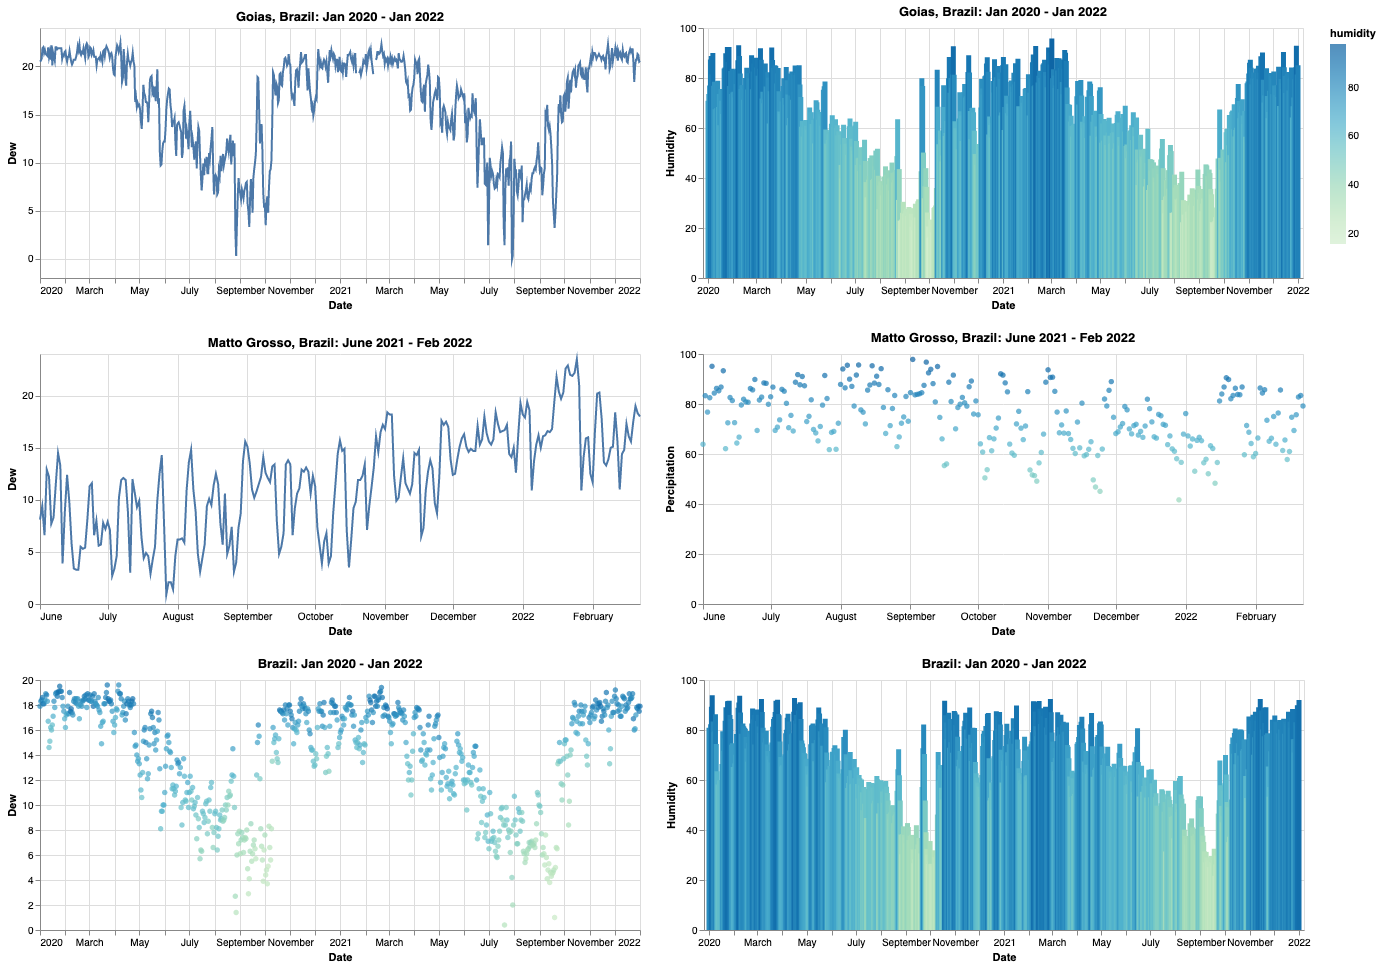

In [185]:
(goias_dew | goias_hum) & (matto_dew | matto_hum) & (brazil_dew | brazil_hum)